<a href="https://colab.research.google.com/github/hey-subodh/MNIST-Handwritten-Digit-Classification-using-Neural-Network/blob/main/MNIST_Handwritten_Digit_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


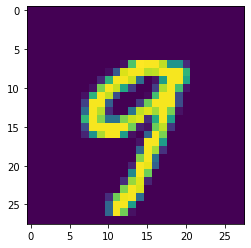

9


In [10]:
# Displaying the image
plt.imshow(X_train[45])
plt.show()

# Printing the corresponding labe
print(Y_train[45])

In [11]:
# Scaling the values(also called as normlization)

X_train = X_train/255
X_test = X_test/255

In [13]:
# Checking the normalization values
print(X_train[25])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network 




In [15]:
# Setting up the layers of the neural network
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
    ]
)

In [16]:
from tensorflow.python import metrics
# Compiling the neural network
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# Training the model
model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2443 - accuracy: 0.9284
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1068 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

Training data accuracy = 99.35%

**Checking the Accuracy on test data**

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9768
0.9768000245094299


Test data accuracy = 97.68% (model doesnt overfit)

In [20]:
print(X_test.shape)

(10000, 28, 28)


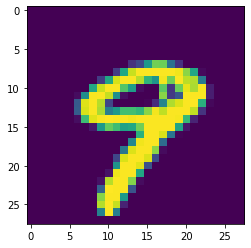

In [22]:
plt.imshow(X_test[9])
plt.show()

In [23]:
print(Y_test[9])

9


In [24]:
Y_pred= model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
print(Y_pred.shape)

(10000, 10)


In [26]:
print(Y_pred[0])

[1.9874096e-06 2.8537091e-02 3.1381030e-02 1.7878143e-02 2.1198377e-06
 3.1654886e-04 1.9657659e-12 9.9999982e-01 2.7227803e-05 9.2129987e-01]


model.predict() gives the prediction probablity of each class for that data point

In [28]:
# Converting the prediction probabilities to class label 1st value

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [29]:
# Converting the prediction probablity to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Building the Confusion Matrix

In [30]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [31]:
print(conf_mat)

tf.Tensor(
[[ 974    0    0    2    0    0    1    0    2    1]
 [   0 1121    1    4    0    3    1    1    4    0]
 [   3    4 1001    6    2    0    1    6    8    1]
 [   0    0    1  990    0    5    0    5    3    6]
 [   0    1    5    1  957    1    2    1    1   13]
 [   3    0    0   16    1  864    2    0    4    2]
 [   3    3    0    1    6   11  930    0    4    0]
 [   1    3    6    3    1    0    0 1003    1   10]
 [   3    0    2    6    6    4    1    4  943    5]
 [   2    2    1    2   13    4    0    4    0  981]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

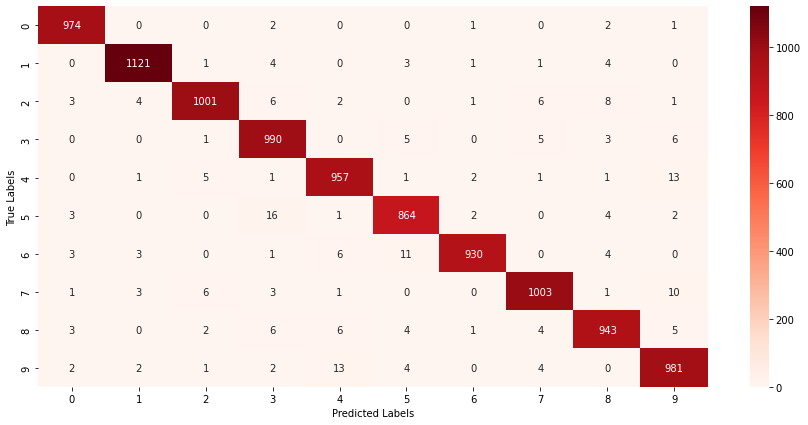

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True , fmt = 'd',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the Predictive System

In [34]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [35]:
type(input_image)

numpy.ndarray

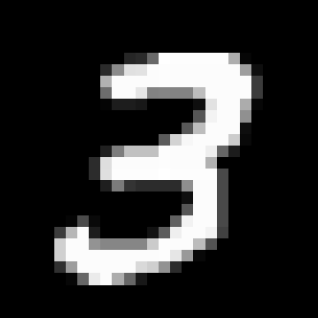

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(318, 318, 3)

In [39]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(318, 318)

In [41]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [42]:
input_image_resize.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resize)

In [44]:
input_image_resize=input_image_resize/255

In [46]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [48]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[7.7692377e-09 1.6504473e-05 1.0835112e-05 1.0000000e+00 1.7930861e-12
  8.7531626e-02 2.4112768e-17 5.4733566e-05 1.3202701e-05 4.2657714e-04]]


In [49]:
input_pred_label =np.argmax(input_prediction)

In [50]:
print(input_pred_label)

3




---



**Predicitive System Steps**

Path of image to be predicted/content/MNIST_digit.png


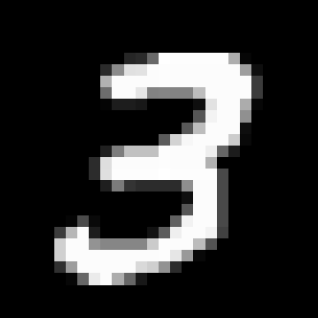

1/1 [==============================] - 0s 29ms/step
The handwritten image matches to:  3


In [51]:
input_image_path = input('Path of image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshape)

input_pred_label =np.argmax(input_prediction)

print('The handwritten image matches to: ',input_pred_label)